# Assignment 3 COMP 4304
## SOHAYIB SAZID FAHIM
### 202148771
### FEB 24, 2023

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('olympic_athletes.csv')

## Question 1

Text(0.5, 1.0, 'Height Distributions (2000 - 2016 Olympics)')

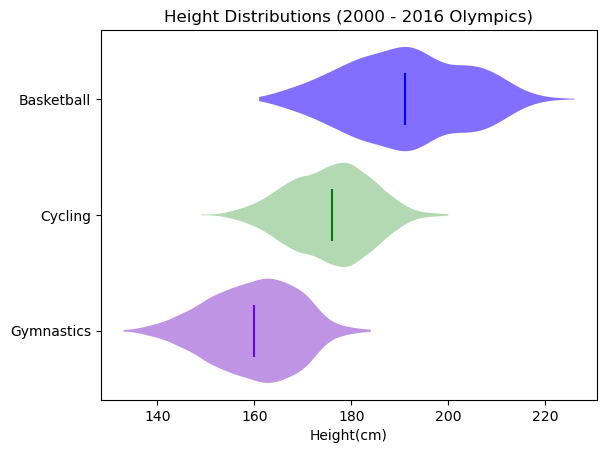

In [3]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.violinplot.html

athletes = df[['Height', 'Sport','Name','Year']].drop_duplicates(subset = 'Name')
basketball = athletes[(athletes.Sport == 'Basketball')& (athletes.Year > 1999) & (athletes.Year<2017)].Height.dropna()
cycling = athletes[(athletes.Sport == 'Cycling')& (athletes.Year > 1999) & (athletes.Year<2017)].Height.dropna()
gymnastics = athletes[(athletes.Sport == 'Gymnastics')& (athletes.Year > 1999) & (athletes.Year<2017)].Height.dropna()

fig, ax = plt.subplots()

color = ['#bf94e4', '#b3d9b3', '#836fff']

violinplot = ax.violinplot([gymnastics, cycling, basketball], vert = False, widths = 0.9, showmedians = True, showextrema = False)

for i in range(len(violinplot['bodies'])):
    violinplot['bodies'][i].set_facecolor(color[i])
    violinplot['bodies'][i].set_alpha(0.6)
    
medianColor = ['#6f00ff', 'green', 'blue' ]
violinplot['cmedians'].set(color = medianColor)

ax.set_yticks([1,2,3])
ax.set_yticklabels(['Gymnastics', 'Cycling', 'Basketball'])

ax.set_xlabel('Height(cm)')
ax.set_title('Height Distributions (2000 - 2016 Olympics)')

## Question 2

Text(0.5, 1.0, 'Average Olymoian Height (+/- std dev) in the summer olympics')

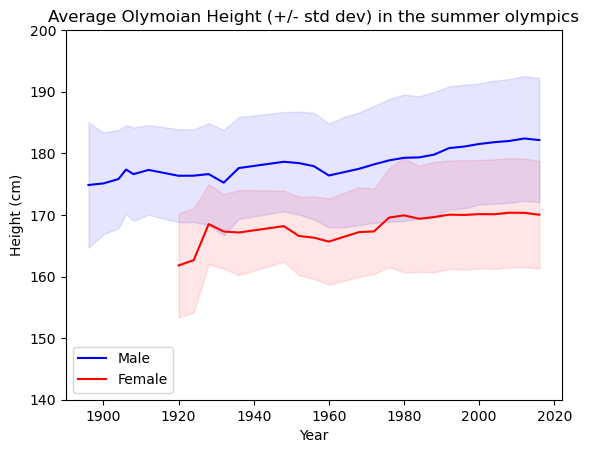

In [4]:
summer = df[(df.Season == 'Summer')]
summer = summer[['Year', 'Name', 'Sex', 'Height']].drop_duplicates().dropna()

male = summer[(summer.Sex == 'M')].groupby('Year').agg({'Height': ['mean', 'std']})
female = summer[(summer.Sex == 'F')].groupby('Year').agg({'Height': ['mean', 'std']})

fig,  ax = plt.subplots()

ax.plot(male.index, male.Height['mean'], color='blue', label = 'Male')
ax.fill_between(male.index, male.Height['mean'] - male.Height['std'], male.Height['mean'] + male.Height['std'], alpha = 0.1, color = 'blue')

ax.plot(female.index, female.Height['mean'], color='red', label = 'Female')
ax.fill_between(female.index, female.Height['mean'] - female.Height['std'], female.Height['mean'] + female.Height['std'], alpha = 0.1, color = 'red')

ax.set_ylim(bottom = 140, top = 200)
ax.set_xlabel('Year')
ax.set_ylabel('Height (cm)')
ax.legend(loc = 'lower left')
ax.set_title('Average Olymoian Height (+/- std dev) in the summer olympics')